# Chapter 10 : Reality Check


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Helper functions imported from textbook
def p_rtail(sampdist,tstat): 
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = x > tstat, color='r') 
    plt.fill_between(x,y, where = x <= tstat, color='g') 
    plt.show() 
    pvalue = np.sum(sampdist < tstat) / len(sampdist) 
    return pvalue 

def p_ltail(sampdist,tstat): 
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = x < tstat, color='r') 
    plt.fill_between(x,y, where = x >= tstat, color='g') 
    plt.show() 
    pvalue = np.sum(sampdist > tstat) / len(sampdist) 

    return pvalue 

def p_2tail(sampdist,tstat):
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() 
    hyp = np.mean(sampdist) 
    cutoff1 = hyp - np.abs(hyp - tstat) 
    cutoff2 = hyp + np.abs(hyp - tstat) 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = (x < cutoff1) | (x > cutoff2), color='r') 
    plt.fill_between(x,y, where = (x >= cutoff1) & (x <= cutoff2), color='g') 
    plt.show() 
    pvalue = np.sum((sampdist < cutoff1) | (sampdist > cutoff2)) / len(sampdist) 
    return pvalue 

In [3]:
#admission csv imported into the directory.
covid = pd.read_csv("CA COVID.csv")
covid.head(5)

,County,FACILITY NAME,COUNTY,FACILITY ID,AVAILABLE BEDS,AVAILABLE BEDS CAPABLE OF ISOLATION,NEW CONFIRMED POSITIVE RESIDENTS,CURRENT ACTIVE CASES RESIDENTS,CUMULATIVE POSITIVE RESIDENTS,COVID-RELATED RESIDENT DEATHS,NEW CONFIRMED POSITIVE HCW,CURRENT ACTIVE HCW,CUMULATIVE POSITIVE HCW,COVID-RELATED HCW DEATHS
0,Alameda,ALAMEDA COUNTY MEDICAL CENTER D/P SNF,ALAMEDA,140000321,7,4,0,0,86,0,0,<11,76,0
1,Alameda,ALAMEDA HEALTHCARE & WELLNESS CENTER,ALAMEDA,20000043,54,8,0,0,88,<11,0,0,55,0
2,Alameda,ALAMEDA HOSPITAL - SOUTHSHORE CONVALESCENT,ALAMEDA,630011864,1,1,0,0,<11,0,0,0,<11,0
3,Alameda,ALAMEDA HOSPITAL D/P SNF,ALAMEDA,140000686,3,1,0,0,<11,0,0,0,13,0
4,Alameda,ALL SAINT'S MAUBERT,ALAMEDA,630013891,2,0,0,0,0,0,0,0,<11,0


In [4]:
size = covid['AVAILABLE BEDS'] 

patients_I = covid['CUMULATIVE POSITIVE RESIDENTS '] 

patients_D = covid['COVID-RELATED RESIDENT DEATHS'] 

staff_I = covid['CUMULATIVE POSITIVE HCW '] 

staff_D = covid['COVID-RELATED HCW DEATHS '] 

beds_i = covid['AVAILABLE BEDS CAPABLE OF ISOLATION']

beds_a = covid['AVAILABLE BEDS']

df = pd.DataFrame(data = {'size':size, 'patients_I':patients_I, 'staff_I':staff_I, 'patients_D':patients_D, 'staff_D':staff_D,'beds_a':beds_a, 'beds_i':beds_i}) 

df.head() 

,size,patients_I,staff_I,patients_D,staff_D,beds_a,beds_i
0,7,86,76,0,0,7,4
1,54,88,55,<11,0,54,8
2,1,<11,<11,0,0,1,1
3,3,<11,13,0,0,3,1
4,2,0,<11,0,0,2,0


In [5]:
df['patients_D'].value_counts() 

<11    618
0      232
11      47
12      38
14      32
13      32
15      30
18      24
17      21
16      19
21      17
19      17
22      12
20      11
29       8
23       7
30       6
24       6
26       5
25       5
27       5
34       5
38       4
32       3
37       2
43       2
28       2
35       1
49       1
31       1
50       1
114      1
65       1
71       1
40       1
36       1
64       1
39       1
33       1
42       1
Name: patients_D, dtype: int64

In [6]:
# I am not to sure whether this would be statistically correct approach
#change <11 to 5 as 5 is the average of 0 and 10.
df_five = df.replace(['<11'], 5)

In [7]:
df_five.head(5)

,size,patients_I,staff_I,patients_D,staff_D,beds_a,beds_i
0,7,86,76,0,0,7,4
1,54,88,55,5,0,54,8
2,1,5,5,0,0,1,1
3,3,5,13,0,0,3,1
4,2,0,5,0,0,2,0


In [8]:
len(df_five[df_five['size'] != "0"]) 

1223

In [9]:
import scipy.stats 

scipy.stats.chisquare([166, 1201-166], [0.15*1201, 0.85*1201]) 

Power_divergenceResult(statistic=1.3075541623810225, pvalue=0.25283796546318715)

2. Are the deaths amongst patients and staff related? 

In [10]:
df_five=df_five.astype(int)
df_five.corr()
#df['patients_D'].corr(df['staff_D'])

,size,patients_I,staff_I,patients_D,staff_D,beds_a,beds_i
size,1.000000,0.212309,0.308394,0.229275,0.065633,1.000000,0.333515
patients_I,0.212309,1.000000,0.719856,0.617668,0.225209,0.212309,0.181630
staff_I,0.308394,0.719856,1.000000,0.474159,0.182638,0.308394,0.232067
patients_D,0.229275,0.617668,0.474159,1.000000,0.182712,0.229275,0.183635
staff_D,0.065633,0.225209,0.182638,0.182712,1.000000,0.065633,0.058129
beds_a,1.000000,0.212309,0.308394,0.229275,0.065633,1.000000,0.333515
beds_i,0.333515,0.181630,0.232067,0.183635,0.058129,0.333515,1.000000


In [11]:
#the correlation coefficient between staff and patient death is very low with 0.18


In [17]:
df1 = df[patients_D != "0"] 

staff_D_1 = np.where(df1['staff_D'] == "0", "none", "some") 

patients_D_1 = np.where(df1['patients_D'] == "<11", "small", "large") 

# chi square contingency table 

no_d_large_inf = ((staff_D_1 == 'none') & (patients_D_1 == 'large')).sum() 

no_d_small_inf = ((staff_D_1 == 'none') & (patients_D_1 == 'small')).sum() 

some_d_small_inf = ((staff_D_1 == 'some') & (patients_D_1 == 'small')).sum() 

some_d_large_inf = ((staff_D_1 == 'some') & (patients_D_1 == 'large')).sum() 

test_arr =np.array( [[no_d_large_inf, no_d_small_inf], [some_d_large_inf, some_d_small_inf]]) 

scipy.stats.chi2_contingency(test_arr)

(24.654522425925222,
 6.858362135826109e-07,
 1,
 array([[315.78910192, 523.21089808],
        [ 57.21089808,  94.78910192]]))

In [16]:
#null hypothesis rejected.

['small' 'small' 'small' 'large' 'large' 'large' 'large' 'large' 'small'
 'large' 'small' 'large' 'small' 'small' 'small' 'large' 'small' 'large'
 'small' 'small' 'large' 'large' 'large' 'small' 'small' 'small' 'large'
 'large' 'large' 'small' 'large' 'large' 'small' 'small' 'large' 'small'
 'large' 'large' 'large' 'large' 'large' 'small' 'small' 'large' 'large'
 'small' 'small' 'small' 'large' 'small' 'large' 'large' 'large' 'small'
 'large' 'large' 'large' 'large' 'large' 'large' 'large' 'small' 'large'
 'large' 'large' 'large' 'small' 'large' 'small' 'small' 'large' 'large'
 'large' 'large' 'large' 'small' 'large' 'small' 'large' 'small' 'large'
 'small' 'small' 'large' 'large' 'large' 'large' 'small' 'small' 'large'
 'large' 'large' 'small' 'large' 'large' 'small' 'large' 'large' 'large'
 'small' 'small' 'small' 'large' 'small' 'small' 'large' 'small' 'large'
 'large' 'large' 'large' 'large' 'large' 'small' 'large' 'small' 'large'
 'small' 'large' 'large' 'small' 'small' 'large' 'l

3. Explore the relationship of total available beds with those equipped for isolation. 

beds_a
9         48
7         46
0         45
8         45
10        45
          ..
65         1
61         1
57         1
53         1
169        1
Length: 99, dtype: int64

In [21]:
#the correlation coefficient is 0.33, which is low.
#use df_five as the dataframe where <11 has been replaced with 5
from scipy.stats import shapiro 
#test for normality
shapiro(df_five['beds_i']) 

ShapiroResult(statistic=0.3855152726173401, pvalue=0.0)

In [22]:
shapiro(df_five['beds_a']) 

ShapiroResult(statistic=0.7841561436653137, pvalue=2.1468130133675747e-37)

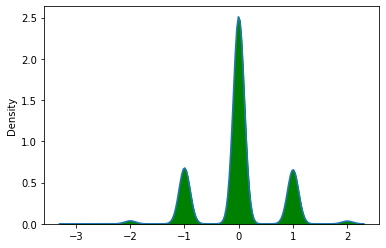

0.0

In [24]:
#both data are not normally distributed, so nonparametric test.
np.random.seed(87654321) 

n = len(df_five['beds_i']) 

def f1(): 

    pool = np.r_[df_five['beds_i'], df_five['beds_a']] 

    s1 = np.random.choice(pool, size=2*n) 

    control1 = s1[:n] 

    treatment = s1[n:2*n] 

    return(np.median(treatment)-np.median(control1)) 

sampdist = [f1() for _ in range(10000)] 

tstat = np.median(df_five['beds_i']) - np.median(df_five['beds_a']) 

p_2tail(sampdist, tstat) 


In [ ]:
#the null hypotthesis that the numbers of beds avaialbe and equipped are unrelated can be rejected.